<a href="https://colab.research.google.com/github/chrisseub/ML-Practice-Rep/blob/main/EGG_WEIGHT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer




In [2]:
Egg_Traits = pd.read_excel('/content/main.xls')
# Now you can work with the DataFrame 'df'
print(Egg_Traits.head()) # Print the first few rows

Egg_Traits.shape
Egg_Traits.describe() #For some descriptive statistics

  STRAIN          AGE  EGG_WEIGHT   EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT  \
0  BROWN  EARLY LAYER         52.5        5.75        4.0         1.8   
1  BROWN  EARLY LAYER         62.6        5.70        4.3           2   
2  BROWN  EARLY LAYER         61.0        5.50        4.3         1.8   
3  BROWN  EARLY LAYER         64.1        5.70        4.4         1.9   
4  BROWN  EARLY LAYER         53.9        5.60        4.0         2.2   

  YOLK_WIDTH ALB_HEIGHT  YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  \
0        4.1        0.7               48.0           5.9             0.27   
1        4.2        0.8               54.8           7.7             0.35   
2          4          1               53.5           7.5             0.35   
3          4          1               55.7           7.4             0.29   
4          4       0.65               46.0           7.0             0.39   

   Haugh Unit  Shell surface area  Yolk Index  Shape Index Outcome  
0   84.390042           63.77

,EGG_WEIGHT,EGG_LENGTH,EGG_WIDTH,YOLK _ALB_WEIGHT,SHELL_WEIGTH,SHELL_THICKNESS,Haugh Unit,Shell surface area,Yolk Index,Shape Index
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,296.000000,300.000000
mean,63.848667,5.800800,4.340500,55.607333,7.593667,0.323033,84.539822,72.483645,48.002424,75.555584
std,6.304399,0.306651,0.291033,5.840976,0.704686,0.042691,0.744175,4.739732,4.481038,5.981744
min,49.700000,5.100000,0.300000,43.000000,5.900000,0.200000,81.801110,61.505237,21.621622,5.263158
25%,59.200000,5.587500,4.200000,51.300000,7.100000,0.290000,84.057052,69.031801,45.238095,73.098388
50%,63.650000,5.800000,4.300000,55.500000,7.500000,0.330000,84.548793,72.414210,47.619048,75.545385
75%,68.600000,6.000000,4.500000,60.350000,8.025000,0.350000,85.045960,76.083555,50.166667,78.181818
max,78.900000,7.000000,4.900000,70.200000,9.900000,0.420000,86.421165,83.442576,61.764706,89.090909


A SCATTER PLOT OF EGG WEIGHT AGAINST STRAIN

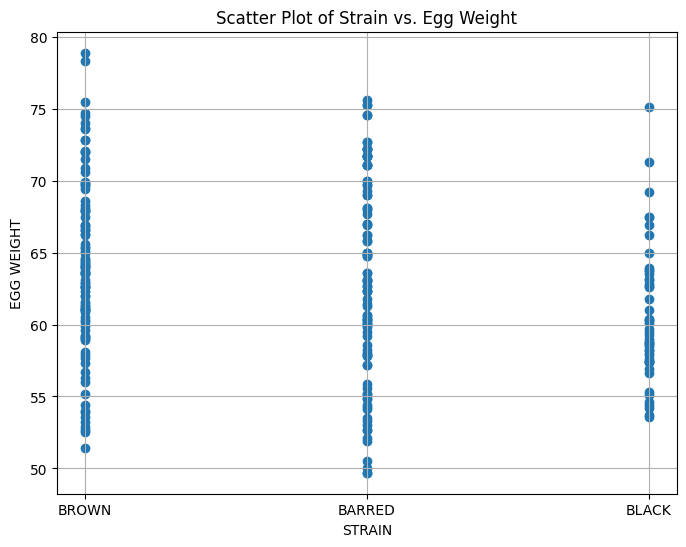

In [4]:
import matplotlib.pyplot as plt

# Create a dictionary to map string values to numeric values
STRAIN_mapping = {'BROWN': 0, 'BARRED': 1, 'BLACK': 2}
# Apply the mapping to the 'STRAIN' column
Egg_Traits['STRAIN_Numeric'] = Egg_Traits['STRAIN'].map(STRAIN_mapping)

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(Egg_Traits['STRAIN_Numeric'], Egg_Traits.iloc[:, 2])  # Use 'STRAIN_Numeric'
plt.xlabel('STRAIN')
plt.ylabel('EGG WEIGHT')
plt.title('Scatter Plot of Strain vs. Egg Weight')

# Update x-axis tick labels
plt.xticks([0, 1, 2], ['BROWN', 'BARRED', 'BLACK'])  # Update labels

plt.grid(True)
plt.show()

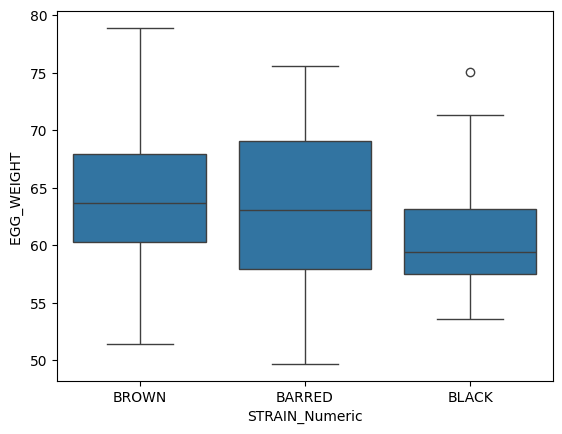

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Egg_Traits.iloc[:, 0]' represents 'STRAIN' and 'Egg_Traits.iloc[:, 2]' represents 'EGG WEIGHT'

# Create a dictionary to map string values to numeric values
STRAIN_mapping = {'BROWN': 0, 'BARRED': 1, 'BLACK': 2}  # Updated mapping
# Apply the mapping to the 'STRAIN' column
Egg_Traits['STRAIN_Numeric'] = Egg_Traits['STRAIN'].map(STRAIN_mapping)

# Create the boxplot using the numeric column
sns.boxplot(x='STRAIN_Numeric', y=Egg_Traits.columns[2], data=Egg_Traits)

# Update x-axis tick labels to reflect strain names
plt.xticks([0, 1, 2], ['BROWN', 'BARRED', 'BLACK']) # Update labels

plt.show()

CORRELATION OF THE DATA


Correlation Matrix:
                    EGG_WEIGHT   EGG_LENGTH  EGG_WIDTH  YOLK _ALB_WEIGHT   \
EGG_WEIGHT             1.000000    0.648580   0.488712           0.964901   
EGG_LENGTH             0.648580    1.000000   0.213562           0.614562   
EGG_WIDTH              0.488712    0.213562   1.000000           0.486549   
YOLK _ALB_WEIGHT       0.964901    0.614562   0.486549           1.000000   
SHELL_WEIGTH           0.477469    0.267839   0.268129           0.389115   
SHELL_THICKNESS       -0.268004   -0.243908  -0.073986          -0.313000   
Haugh Unit            -0.371642   -0.364591  -0.169908          -0.360263   
Shell surface area     0.999813    0.649473   0.489187           0.964721   
Yolk Index            -0.117916   -0.131762  -0.013615          -0.111385   
Shape Index           -0.147724   -0.555831   0.626756          -0.118220   
STRAIN_Numeric        -0.189939    0.003415  -0.048094          -0.178343   

                    SHELL_WEIGTH  SHELL_THICKNESS  Hau

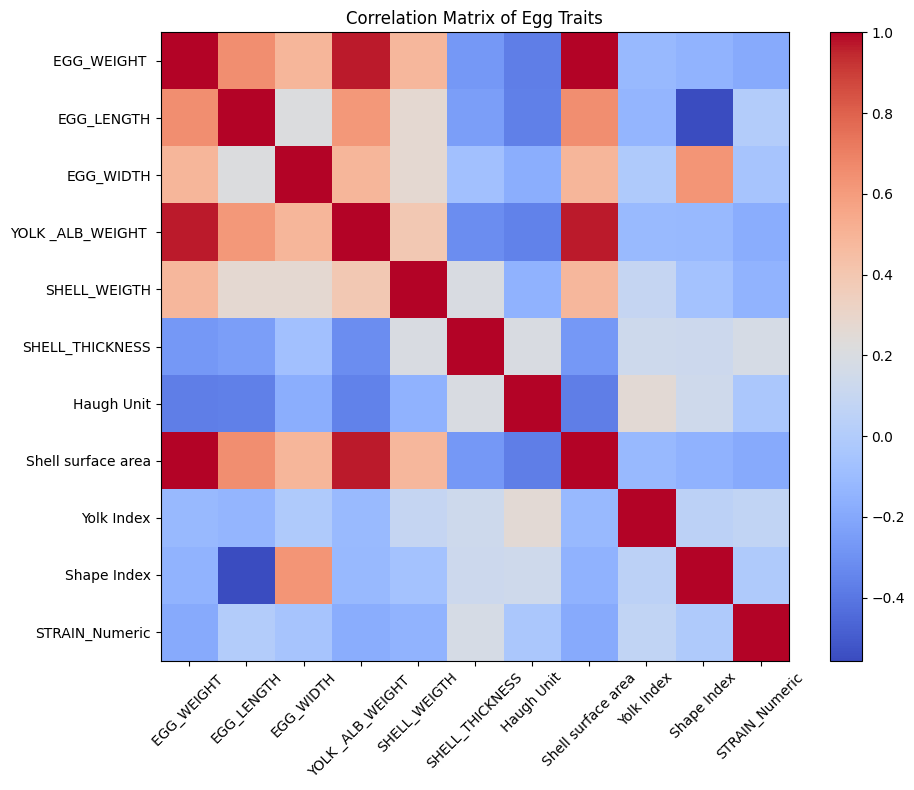

In [6]:
# Calculate the correlation matrix
import seaborn as sns
# Select only numeric columns for correlation analysis
numeric_egg_traits = Egg_Traits.select_dtypes(include=np.number)

# Calculate the correlation matrix using only numeric columns
correlation_matrix = numeric_egg_traits.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Egg Traits')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [7]:
Egg_Traits['Outcome'].value_counts()
# Select numeric columns for calculating the mean


,count
Outcome,
Large,229
Small,71


In [8]:
numeric_columns = Egg_Traits.select_dtypes(include=np.number).columns

# Calculate the mean for only numeric columns
Egg_Traits.groupby('Outcome')[numeric_columns].mean()

,EGG_WEIGHT,EGG_LENGTH,EGG_WIDTH,YOLK _ALB_WEIGHT,SHELL_WEIGTH,SHELL_THICKNESS,Haugh Unit,Shell surface area,Yolk Index,Shape Index,STRAIN_Numeric
Outcome,,,,,,,,,,,
Large,66.427948,5.890349,4.392140,57.916594,7.759825,0.317031,84.428646,74.443886,47.850931,74.856325,0.696133
Small,55.529577,5.511972,4.173944,48.159155,7.057746,0.342394,84.896838,66.161177,48.510369,77.810941,1.072464


In [9]:
# Create a dictionary to map string values to numeric values
STRAIN_mapping = {'BLACK': 0, 'BROWN': 1,'BARRED':2}
# Apply the mapping to the 'Outcome' column
Egg_Traits['STRAIN_Numeric'] = Egg_Traits['STRAIN'].map(STRAIN_mapping)
Outcome_mapping = {'Small': 0, 'Large': 1}
# Apply the mapping to the 'Outcome' column
Egg_Traits['Outcome_Numeric'] = Egg_Traits['Outcome'].map(Outcome_mapping)
# You can now use the 'Outcome_Numeric' column for calculations
print(Egg_Traits.head())  # Print the first few rows to verify


#0 is for Small
#1 is for Large

  STRAIN          AGE  EGG_WEIGHT   EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT  \
0  BROWN  EARLY LAYER         52.5        5.75        4.0         1.8   
1  BROWN  EARLY LAYER         62.6        5.70        4.3           2   
2  BROWN  EARLY LAYER         61.0        5.50        4.3         1.8   
3  BROWN  EARLY LAYER         64.1        5.70        4.4         1.9   
4  BROWN  EARLY LAYER         53.9        5.60        4.0         2.2   

  YOLK_WIDTH ALB_HEIGHT  YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  \
0        4.1        0.7               48.0           5.9             0.27   
1        4.2        0.8               54.8           7.7             0.35   
2          4          1               53.5           7.5             0.35   
3          4          1               55.7           7.4             0.29   
4          4       0.65               46.0           7.0             0.39   

   Haugh Unit  Shell surface area  Yolk Index  Shape Index Outcome  \
0   84.390042           63.7

In [10]:
# Drop column 15 and create a new DataFrame
new_egg_traits = Egg_Traits.drop(columns=[Egg_Traits.columns[15], Egg_Traits.columns[2]])

# Print the first few rows of the new DataFrame to verify
print(new_egg_traits.head())
print(new_egg_traits.head())

  STRAIN          AGE  EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT YOLK_WIDTH  \
0  BROWN  EARLY LAYER        5.75        4.0         1.8        4.1   
1  BROWN  EARLY LAYER        5.70        4.3           2        4.2   
2  BROWN  EARLY LAYER        5.50        4.3         1.8          4   
3  BROWN  EARLY LAYER        5.70        4.4         1.9          4   
4  BROWN  EARLY LAYER        5.60        4.0         2.2          4   

  ALB_HEIGHT  YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  Haugh Unit  \
0        0.7               48.0           5.9             0.27   84.390042   
1        0.8               54.8           7.7             0.35   84.416908   
2          1               53.5           7.5             0.35   85.517341   
3          1               55.7           7.4             0.29   85.373317   
4       0.65               46.0           7.0             0.39   84.054650   

   Shell surface area  Yolk Index  Shape Index  STRAIN_Numeric  \
0           63.770823   43.902439    6

SEPERATING THE DATA AND LABELS

In [11]:
X = new_egg_traits.drop(columns=['Outcome_Numeric', 'STRAIN', 'AGE'], axis=1)
Y = new_egg_traits['Outcome_Numeric']
print(X,Y)

     EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT YOLK_WIDTH ALB_HEIGHT  \
0          5.75       4.00         1.8        4.1        0.7   
1          5.70       4.30           2        4.2        0.8   
2          5.50       4.30         1.8          4          1   
3          5.70       4.40         1.9          4          1   
4          5.60       4.00         2.2          4       0.65   
..          ...        ...         ...        ...        ...   
295        5.30       4.15        1.85        3.9        0.8   
296        5.65       4.25        2.05       3.95        0.8   
297        5.70       4.30         1.9        3.8        0.9   
298        5.60       4.20        1.75        3.8        0.8   
299        6.10       4.20         1.8          4        0.8   

     YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  Haugh Unit  \
0                 48.0           5.9             0.27   84.390042   
1                 54.8           7.7             0.35   84.416908   
2                 53.5  

STANDADIZATION OF DATA

In [12]:
# SEPERATING THE DATA AND LABELS
X = new_egg_traits.drop(columns=['Outcome_Numeric', 'STRAIN', 'AGE'], axis=1)
Y = new_egg_traits['Outcome_Numeric']
print(X,Y)

for column in X.columns:
    X[column] = pd.to_numeric(X[column].replace('-', np.nan), errors='coerce')

# Perform imputation using SimpleImputer to fill NaN values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies
X = pd.DataFrame(imputer.fit_transform(X), columns=new_egg_traits.drop(columns=['Outcome_Numeric', 'STRAIN', 'AGE'], axis=1).columns)


# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

     EGG_LENGTH  EGG_WIDTH YOLK_HEIGHT YOLK_WIDTH ALB_HEIGHT  \
0          5.75       4.00         1.8        4.1        0.7   
1          5.70       4.30           2        4.2        0.8   
2          5.50       4.30         1.8          4          1   
3          5.70       4.40         1.9          4          1   
4          5.60       4.00         2.2          4       0.65   
..          ...        ...         ...        ...        ...   
295        5.30       4.15        1.85        3.9        0.8   
296        5.65       4.25        2.05       3.95        0.8   
297        5.70       4.30         1.9        3.8        0.9   
298        5.60       4.20        1.75        3.8        0.8   
299        6.10       4.20         1.8          4        0.8   

     YOLK _ALB_WEIGHT   SHELL_WEIGTH  SHELL_THICKNESS  Haugh Unit  \
0                 48.0           5.9             0.27   84.390042   
1                 54.8           7.7             0.35   84.416908   
2                 53.5  

<ipython-input-12-568fa02f424f>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = pd.to_numeric(X[column].replace('-', np.nan), errors='coerce')


TRAIN AND TEST DATA SPLITTING



In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(300, 13) (240, 13) (60, 13)


TRAINING OUR MODEL (SVM)

In [14]:
classified = svm.SVC(kernel='linear')
classified.fit(X_train, Y_train)

SVC(kernel='linear')

DETERMINE ACCURACY ON TRAINING DATA

In [15]:
X_train_prediction = classified.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

X_test_prediction = classified.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.9875
Accuracy score of the test data :  0.95


MAKING A PREDICTION

In [16]:
"""Features to be inputed are:
Egg length, Egg width,
Yolk height, Yolk width,
Albumin height, Yolk albumin weight,
Shell weight, Shell thickness,
Haugh unit, Shell surface area,
Yolk index, Shape index,
Strain {black is 0, brown is 1, barred is 2,}) accordingly"""

EGG_data = (5.7, 6, 2, 4.2, 0.8, 54, 7.7, 0.37, 84.4, 71.8, 47.9, 75.6, 0)
#changing the egg data to numpy array
EGG_data_as_numpy_array = np.asarray(EGG_data)

#reshape the array
EGG_data_reshaped = EGG_data_as_numpy_array.reshape(1,-1)

#Standadizing the egg data
standard_data = scaler.transform(EGG_data_reshaped)
print(standard_data)

prediction = classified.predict(standard_data)
print(prediction)
if (prediction[0] == 0):
  print('This Egg is Small')
else:
  print('This Egg is Big')


[[-0.32926172  5.71162273  0.4896359   0.585906   -0.25392849 -0.2756421
   0.15114683  1.1019862  -0.18851798 -0.1444781  -0.02304998  0.00743763
  -1.75662013]]
[1]
This Egg is Big


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.metrics import precision_score, f1_score, classification_report, recall_score, mean_squared_error, r2_score # Import recall_score, mean_squared_error, and r2_score
y_pred = classified.predict(X_test) # Predictions from your model

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

recall = recall_score(Y_test, y_pred)
print(f"Recall: {recall}")

mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

Accuracy: 0.95
Recall: 0.9347826086956522
Mean Squared Error: 0.05
R-squared: 0.7204968944099378
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.93      0.97        46

    accuracy                           0.95        60
   macro avg       0.91      0.97      0.93        60
weighted avg       0.96      0.95      0.95        60

